<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Walkthrough of Standard EDA Procedure

_Authors: Kiefer Katovich (SF), Minor updates by David Yerrington (SF)_

---

This lesson uses a boston housing market dataset to walk through a basic exploratory data analysis procedure, starting from the very beginning with loading the data. 

Though in many if not most cases the EDA procedure will be considerably more involved, this should give you an idea of the basic workflow a data scientist would go through when taking a look at a new dataset.

Note: this lesson is strictly exploratory. We will not be formulating any hypotheses about the data or testing them. In many cases you may have formulated a hypothesis before even looking at your data, which could considerably affect your focus and choices in what to investigate.


### Learning Objectives

- Quickly describe a dataset, including data types, missing values and basic descriptive statistics
- Rename columns (series) in a dataframe
- Visualize data distributions with boxplots
- Standardize variables and explain why this is often a useful thing to do
- Calculate and visualize correlation

### Lesson Guide

- [Description of the Boston Housing Data](#data_description)
- [Loading the data](#load_data)
- [Drop unwanted columns](#drop)
- [Clean corrupted data](#clean)
- [Count null values and drop rows](#drop_nulls)
- [Rename columns](#rename)
- [Investigate potential outliers with boxplots](#boxplots)
- [Plot all variables together](#plot_all)
- [Plot the standardized variables together](#plot_all_rescaled)
- [Look at the correlation between variables](#cov_cor)


<a id='data_description'></a>

### Description of the Boston Housing Data columns

---

The columns of the dataset are coded. The corresponding descriptions are:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars
    
Each row in the dataset represents a different suburb of Boston.

These descriptions of shortened or coded variables are often called "codebooks" or data dictionaries. They are typically found with datasets you might find online in a separate file.


**Load packages:**

In [13]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='load_data'></a>

### 1. Load the data

---

Import the csv into a pandas DataFrame.

In [14]:
boston_file = './datasets/housing.csv'

In [15]:
df = pd.read_csv(boston_file)

<a id='header'></a>

### 2. Describe the basic format of the data and the columns

---

Use the `.head()` function (and optionally pass in an integer for the number of rows you want to see) to examine what the loaded data looks like. This is a good initial step to get a feel for what is in the csv and what problems may be present.

The `.dtypes` attribute tells you the data type for each of your columns.

In [16]:
# Print out the first 8 rows:
df.head(8)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,"4,09",1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,"4,9671",2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,"4,9671",2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,"6,0622",3,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,"6,0622",3,222,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0,0.458,6.430,58.7,"6,0622",3,222,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0,0.524,6.012,66.6,"5,5605",5,311,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0,0.524,6.172,96.1,"5,9505",5,311,15.2,19.15,27.1


In [17]:
# Look at the dtypes of the columns:
df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS            int64
NOX           float64
RM            float64
AGE           float64
DIS            object
RAD            object
TAX             int64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
Unnamed: 0    506 non-null int64
CRIM          506 non-null float64
ZN            506 non-null float64
INDUS         506 non-null float64
CHAS          506 non-null int64
NOX           506 non-null float64
RM            506 non-null float64
AGE           506 non-null float64
DIS           506 non-null object
RAD           506 non-null object
TAX           506 non-null int64
PTRATIO       506 non-null float64
LSTAT         506 non-null float64
MEDV          506 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 55.4+ KB


<a id='drop'></a>

### 2. Drop unwanted columns

---

There is a column labeled `Unnamed: 0` which appears to simply number the rows. We already have the number id of the rows in the DataFrame's index and so we don't need this column.

The `.drop()` built-in function can be used to get rid of a column. When removing a column, we need to specify `axis=1` to the function.

For the record, the `.index` attribute holds the row indices. This is the the sister attribute to the `.columns` attribute that we work with more often.



In [19]:
# print out the index object and the first 20 items in the DataFrame's index 
# to see that we have these row numbers already:
df['Unnamed: 0'].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [20]:
# Remove the unneccesary column:
df.drop('Unnamed: 0', axis =1, inplace=True)

<a id='clean'></a>

### 3. Clean corrupted columns

---

You may have noticed when we examined the `dtypes` attribute that two of the columns were of type "object", indicating that they were string. However, we know from the data description above (and we can infer from the header of the data) that `DIS` and `RAD` should in fact be numeric.

It is pretty common to have numeric columns represented as strings in your data if some of the observations are corrupted. It is important to always check the data types of your columns.

**3.A What is causing the `DIS` column to be encoded as a string? Figure out a way to make sure the column is numeric while preserving information.**

*Tip: The `.map()` built-in function on a column will apply a function to each element of the column.*

In [22]:
# A:
# Use the .map() function to change the commas to periods and convert back into floats:
df.DIS = df.DIS.map(lambda x: float(x.replace(',','')))
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,409.0,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,49671.0,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,49671.0,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,60622.0,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,60622.0,3,222,18.7,5.33,36.2


**3.B What is causing the `RAD` column to be encoded as string? Figure out a way to make sure the column is numeric while preserving information.**

*Tip: You can put `np.nan` values in place of corrupted observations, which are numeric "Null" values.*

In [23]:
# A:
df.RAD.unique()

array(['1', '2', '3', '5', '4', '?', '8', '6', '7', '24'], dtype=object)

In [24]:
# Looks like some of the rows have a '?' in place of a number. 
# Use the .map() function to replace the question marks with np.nan and convert the others
# to float values:
df.RAD = df.RAD.map(lambda x: np.nan if x == '?' else float(x))
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,409.0,1.0,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,49671.0,2.0,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,49671.0,2.0,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,60622.0,3.0,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,60622.0,3.0,222,18.7,5.33,36.2


In [29]:
df['CHAS'] = df['CHAS'].map(lambda x: 0 if x == 1 else 1)

In [30]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,1,0.538,6.575,65.2,409.0,1.0,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,1,0.469,6.421,78.9,49671.0,2.0,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,1,0.469,7.185,61.1,49671.0,2.0,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,1,0.458,6.998,45.8,60622.0,3.0,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,1,0.458,7.147,54.2,60622.0,3.0,222,18.7,5.33,36.2


In [25]:
type(np.nan)

float

<a id='drop_nulls'></a>

### 4. Determine how many observations are missing

---

Having replaced the question marks with `np.nan` values, we know that there are some missing observations for the `RAD` column. 

When we start to build models with data, null values in observations are (almost) never allowed. It is important to always see how many observations are missing and for which columns.

A handy way to look at how many null values there are per column with pandas is:

```python
boston.isnull().sum()
```

The `.isull()` built-in function will convert the columns to boolean `True` and `False` values (returning a new dataframe) where null values are indicated by `True`. 

The `.sum()` function tacked on to the back of that will then sum these boolean columns, and the total number of null values per column will be returned.

In [31]:
# A
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD        40
TAX         0
PTRATIO     0
LSTAT       0
MEDV        0
dtype: int64

**Drop the null values.** 

In this case, lets keep it simple and just drop the rows from the dataset that contain null values. If a column has a ton of null values it often makes more sense to drop the column entirely instead of the rows with null values. In this case, we will just drop the rows.

The `.dropna()` function will drop any rows that have _**ANY**_ null values for you.  Use this carefully as you could drop many more rows than expected.

In [32]:
# A:
df.dropna(inplace=True)

<a id='rename'></a>

### 5. Make the column names more descriptive

---

Often it is annoying to have to memorize what the codes mean for columns, or reference the codebook whenever I want to know the meaning of a variable. It often makes sense to rename columns that are not descriptive.

There is more than one way to do this, but one easy way is to use the `.rename()` function.

Here are the column names and their descriptions again for reference:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars
    

In [ ]:
# A:

There two popular methods to rename dataframe columns.
1. Using a _dictionary substitution_, which is very useful if you only want to rename a few of the columns. This method uses the `.rename()` function.
2. Using a _list replacement_, which is quicker than writing out a dictionary, but requires a full list of names.

In [33]:
# Dictionary Method
new_columns_dict = {
        'CRIM':'rate_of_crime',
        'ZN':'residential_zone_pct',
        'INDUS':'business_zone_pct',
        'CHAS':'borders_river',
        'NOX':'oxide_concentration',
        'RM':'average_rooms',
        'AGE':'owner_occup_pct',
        'DIS':'dist_to_work',
        'RAD':'access_to_highway',
        'TAX':'property_tax',
        'PTRATIO':'student_teacher_ratio',
        'LSTAT':'pct_underclass',
        'MEDV':'home_median_value'
    }

In [35]:
df.rename(columns = new_columns_dict, inplace = True)

In [37]:
# List Replacement Method
new_columns_list = ['rate_of_crime', 'residential_zone_pct', 'business_zone_pct',
       'borders_river', 'oxide_concentration', 'average_rooms',
       'owner_occup_pct', 'dist_to_work', 'access_to_highway', 'property_tax',
       'student_teacher_ratio', 'pct_underclass',
       'home_median_value']

In [38]:
df.columns = new_columns_list

In [39]:
df.head()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,pct_underclass,home_median_value
0,0.00632,18.0,2.31,1,0.538,6.575,65.2,409.0,1.0,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,1,0.469,6.421,78.9,49671.0,2.0,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,1,0.469,7.185,61.1,49671.0,2.0,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,1,0.458,6.998,45.8,60622.0,3.0,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,1,0.458,7.147,54.2,60622.0,3.0,222,18.7,5.33,36.2


<a id='describe'></a>

### 6. Describe the summary statistics for the columns

<img src="https://snag.gy/07JFa5.jpg" width="350">

---

The `.describe()` function gives summary statistics for each of your variables. What are some, if any, oddities you notice about the variables based on this output?

In [40]:
# A:
df.describe()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,pct_underclass,home_median_value
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,3.326334,11.154506,11.144292,0.924893,0.555840,6.272489,68.504506,33870.045064,9.611588,410.049356,18.462876,12.650129,22.484120
std,7.095767,22.731621,6.820913,0.263848,0.116818,0.696995,28.023878,23233.656022,8.735627,168.921219,2.167158,7.068120,9.017586
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,6.000000,21.000000,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,1.000000,0.450000,5.884250,45.450000,17699.500000,4.000000,280.250000,17.400000,7.125000,16.800000
50%,0.256355,0.000000,9.690000,1.000000,0.538000,6.189000,77.150000,27778.000000,5.000000,330.000000,19.050000,11.300000,21.200000
75%,3.689387,12.500000,18.100000,1.000000,0.624000,6.618750,93.975000,47852.500000,24.000000,666.000000,20.200000,16.955000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,121265.000000,24.000000,711.000000,22.000000,37.970000,50.000000


In [41]:
df.describe()[['rate_of_crime', 'residential_zone_pct']]

,rate_of_crime,residential_zone_pct
count,466.000000,466.000000
mean,3.326334,11.154506
std,7.095767,22.731621
min,0.006320,0.000000
25%,0.083235,0.000000
50%,0.256355,0.000000
75%,3.689387,12.500000
max,73.534100,100.000000


In [42]:
df['rate_of_crime'].describe()

count    466.000000
mean       3.326334
std        7.095767
min        0.006320
25%        0.083235
50%        0.256355
75%        3.689387
max       73.534100
Name: rate_of_crime, dtype: float64

<a id='boxplots'></a>

### 7. Plot variables with potential outliers using boxplots.

---

Here we will use the seaborn package to plot boxplots of the variables we have identified as potentially having outliers.

Some notes on seaborn's boxplot keyword argument options:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent

There are more keyword arguments available but those are most relevant for now.

_If you want to check out more, place your cursor in the `boxplot` argument bracket and press `shift+tab` (Press four times repeatedly to bring up detailed documentation)._
    

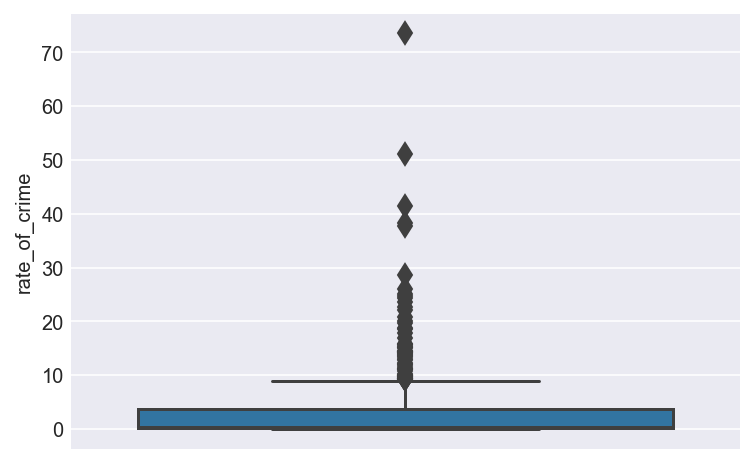

In [43]:
# rate of crime
sns.boxplot(df.rate_of_crime, orient = 'v', fliersize = 8)

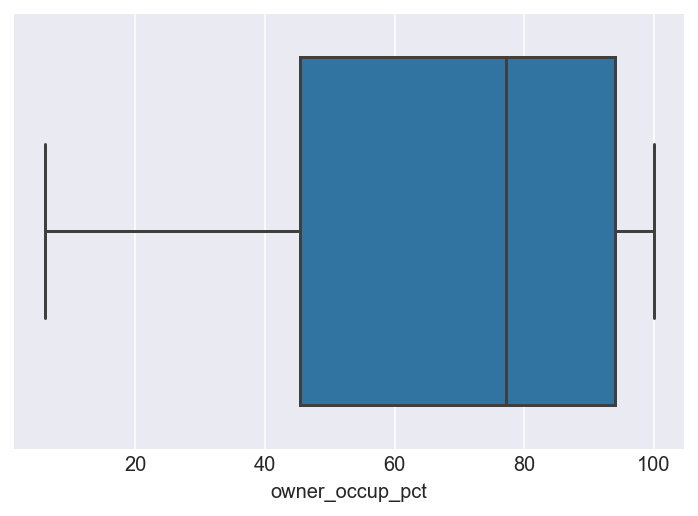

In [44]:
# percent owner occupied
sns.boxplot(df.owner_occup_pct)


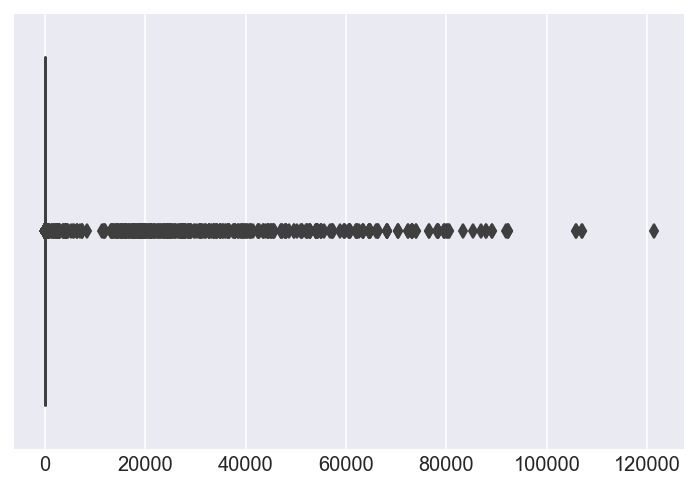

In [47]:
sns.boxplot(df, orient = 'h')

In [ ]:
# business zone percent


<a id='plot_all'></a>

### 8. Plot all the variables on boxplots together.

---

Plot all the variables using using a horizontal boxplot with seaborn. What is wrong with this plot, if anything?

In [ ]:
# A:



<a id='cov_cor'></a>

### 9. Correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.

Below is the formula for the correlation between two variables $X$ and $Y$:

#### 9.A Correlation

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

Calculate the correlation between `access_to_highway` and `home_median_value` using `np.corrcoef()`:


In [51]:
# A:

np.corrcoef(df.access_to_highway, df.home_median_value)

array([[ 1.       , -0.3708425],
       [-0.3708425,  1.       ]])

In [53]:
heat = df.corr()

#### 9.B The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using pandas DataFrame's built in `.corr()` function. Use it below on the boston dataset.

It is very useful to get a feel for what is related and what is not, which can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

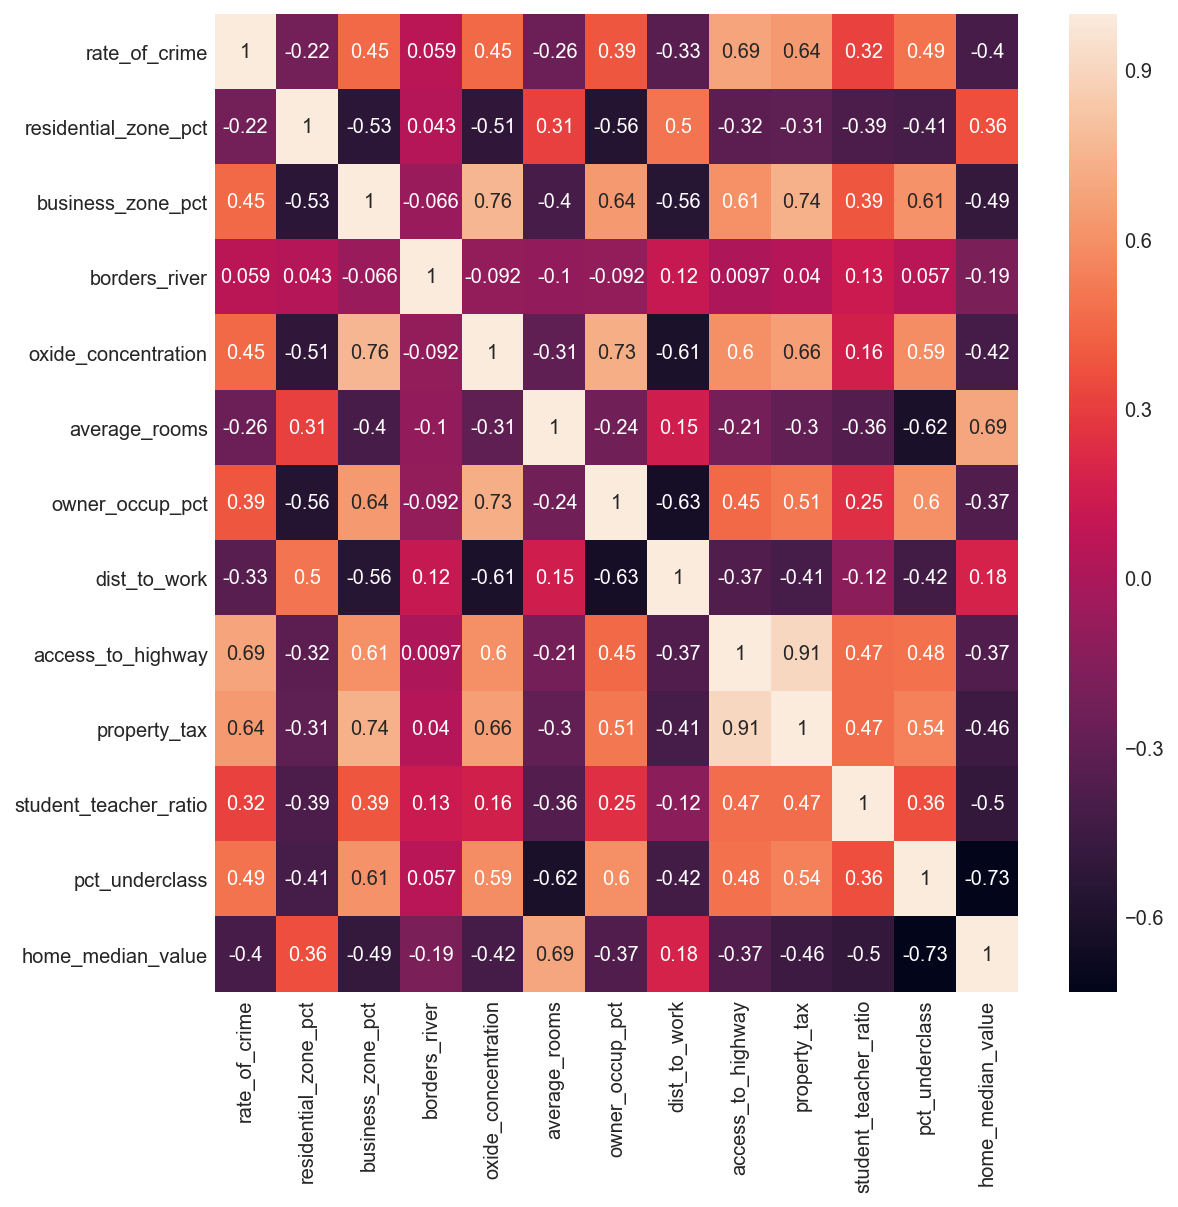

In [58]:
# A:  
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True)

**Seaborn also has a great way of showing this to us visually, if colors stick out to you more than decimal values.**

In [60]:
# A:

# sns.pairplot(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [67]:
rate_of_crime_var_num = (df.rate_of_crime - df.rate_of_crime.mean())**2
rate_of_crime_var_num.sum()/ (len(df)-1)

50.34990465471494

In [68]:
df.cov()   #covariance matrix

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,pct_underclass,home_median_value
rate_of_crime,50.349905,-36.216775,21.952731,0.110996,0.376986,-1.282649,76.719323,-5.409555e+04,42.544750,7.655079e+02,4.891042,24.521645,-25.766583
residential_zone_pct,-36.216775,516.726614,-82.921589,0.258941,-1.358976,4.948419,-359.546074,2.628825e+05,-62.972117,-1.203385e+03,-19.047262,-66.613396,73.332566
business_zone_pct,21.952731,-82.921589,46.524851,-0.118537,0.605595,-1.925200,121.396798,-8.799004e+04,36.094896,8.505873e+02,5.730828,29.475871,-30.149056
borders_river,0.110996,0.258941,-0.118537,0.069616,-0.002829,-0.018600,-0.677080,7.098937e+02,0.022378,1.790812e+00,0.073120,0.106010,-0.448292
oxide_concentration,0.376986,-1.358976,0.605595,-0.002829,0.013647,-0.024890,2.384820,-1.657373e+03,0.610866,1.295401e+01,0.041482,0.487563,-0.443127
average_rooms,-1.282649,4.948419,-1.925200,-0.018600,-0.024890,0.485802,-4.661612,2.494570e+03,-1.304810,-3.519970e+01,-0.536364,-3.033314,4.342185
owner_occup_pct,76.719323,-359.546074,121.396798,-0.677080,2.384820,-4.661612,785.337765,-4.120774e+05,110.884550,2.394183e+03,15.019264,118.706657,-94.608272
dist_to_work,-54095.553481,262882.485495,-87990.042860,709.893715,-1657.372609,2494.570374,-412077.449021,5.398028e+08,-75545.700738,-1.609784e+06,-6076.538323,-69457.250156,37924.734050
access_to_highway,42.544750,-62.972117,36.094896,0.022378,0.610866,-1.304810,110.884550,-7.554570e+04,76.311177,1.340322e+03,8.876517,29.660179,-29.212848
property_tax,765.507946,-1203.385062,850.587250,1.790812,12.954012,-35.199704,2394.183218,-1.609784e+06,1340.322438,2.853438e+04,170.582696,648.594381,-704.844161


In [66]:
df.rate_of_crime.std()

7.0957666713833634

In [70]:
## correlation

num = ((df.rate_of_crime - df.rate_of_crime.mean()) * (df.home_median_value - df.home_median_value.mean())).sum()
num / (len(df)- 1) / (df.rate_of_crime.std() * df.home_median_value.std())

-0.40268661511101861

In [71]:
df.corr()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,pct_underclass,home_median_value
rate_of_crime,1.000000,-0.224533,0.453573,0.059286,0.454794,-0.259346,0.385813,-0.328129,0.686361,0.638655,0.318062,0.488930,-0.402687
residential_zone_pct,-0.224533,1.000000,-0.534804,0.043174,-0.511765,0.312325,-0.564412,0.497753,-0.317120,-0.313394,-0.386644,-0.414598,0.357747
business_zone_pct,0.453573,-0.534804,1.000000,-0.065866,0.760027,-0.404952,0.635092,-0.555231,0.605772,0.738231,0.387690,0.611393,-0.490163
borders_river,0.059286,0.043174,-0.065866,1.000000,-0.091785,-0.101140,-0.091571,0.115804,0.009709,0.040180,0.127876,0.056845,-0.188416
oxide_concentration,0.454794,-0.511765,0.760027,-0.091785,1.000000,-0.305690,0.728478,-0.610649,0.598606,0.656462,0.163856,0.590495,-0.420656
average_rooms,-0.259346,0.312325,-0.404952,-0.101140,-0.305690,1.000000,-0.238659,0.154045,-0.214301,-0.298968,-0.355091,-0.615721,0.690857
owner_occup_pct,0.385813,-0.564412,0.635092,-0.091571,0.728478,-0.238659,1.000000,-0.632897,0.452948,0.505761,0.247303,0.599298,-0.374378
dist_to_work,-0.328129,0.497753,-0.555231,0.115804,-0.610649,0.154045,-0.632897,1.000000,-0.372219,-0.410172,-0.120684,-0.422957,0.181015
access_to_highway,0.686361,-0.317120,0.605772,0.009709,0.598606,-0.214301,0.452948,-0.372219,1.000000,0.908304,0.468876,0.480370,-0.370843
property_tax,0.638655,-0.313394,0.738231,0.040180,0.656462,-0.298968,0.505761,-0.410172,0.908304,1.000000,0.465972,0.543232,-0.462720


In [ ]:
# covariance looks at how the variance of one column related to the variance in another column